## Первая лекция из цикла по CV.

### Темы лекции:

#### – Работа с растровыми изображениями, как с массивом чисел с помощью библиотек NumPy, PIL и OpenCV. Разбор задачи из контеста – “Параметры геометрических фигур”.

#### – Цвет в понимании машины. Работа с цветовыми каналами изображения: RGB, grayscale. Разбор задачи из контеста – “Пустыня или лес?”. 

#### – Введение в линейную алгебру. Понятие вектора и матрицы, перемножение матриц. Линейные преобразования – сдвиг, поворот, отображение. Свертки и их воздействие на матрицы. Типы сверток, фильтрация с помощью ядер сверток. Примеры линейных преобразований.   

#### – Методы предобработки изображений: поворот изображений, выделение области (ROI) для удаления или вставки, восстановление яркости и контраста. Примеры работы всех выше описанных методов в библиотеке OpenCV. 

#### – Понятие контура и способы для его выделения: алгоритм связных областей, преобразование Хафа, операторные методы, метод бинаризации по освещенности. 


Растровое изображение - изображение, представляющее собой сетку пикселей — цветных точек. 
Важными характеристиками изображения являются: размер, глубина цвета и цветовое пространство.

![title](img/RGB_cube.png)

In [1]:
import cv2
import numpy as np
import matplotlib.pyplot as plt 

%matplotlib inline

In [2]:
## считаем изображение 
img  = cv2.imread('img\\RGB_cube.png')
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

In [3]:
## посмотрим что это за объект
type(img)

numpy.ndarray

In [4]:
## размерность массива
img.shape

(457, 640, 3)

In [5]:
## создадим grayscale изображение с помощью openCV
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

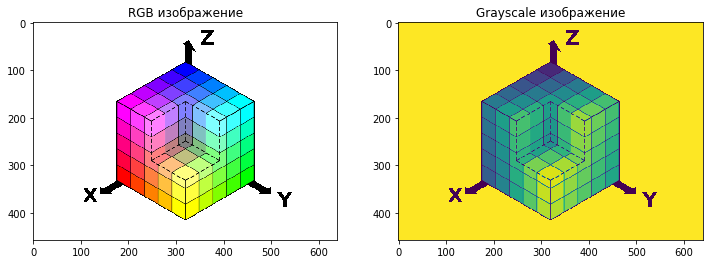

In [6]:
## поглядим, что мы считали
fig, m_axs = plt.subplots(1, 2, figsize = (12, 8))
ax1, ax2 = m_axs

ax1.set_title('RGB изображение')
ax1.imshow(img)

ax2.set_title('Grayscale изображение')
ax2.imshow(gray)

### Поиграемся с каналами

Посмторим на картинку, где есть только красный, зеленый и синий

In [7]:
img_data = img.copy()

r = img_data[:,:,0]
r[r != 255] = 0

g = img_data[:,:,1]
g[g != 255] = 0

b = img_data[:,:,2]
b[b != 255] = 0

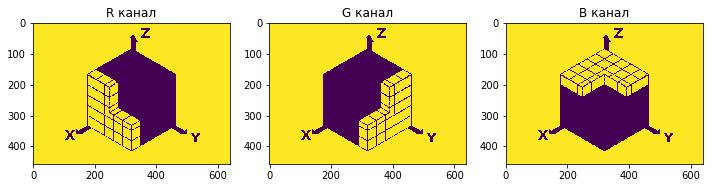

In [8]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 3, figsize = (12, 8))
ax1, ax2, ax3 = m_axs

ax1.set_title('R канал')
ax1.imshow(r)

ax2.set_title('G канал')
ax2.imshow(g)

ax3.set_title('B канал')
ax3.imshow(b)

Почему так получилось?

Давайте изменим конфигурацию каналов, чтобы посмотреть на изменения. 

In [9]:
img_data = img.copy()

r = img_data[:,:,0]
r[r < 100] = 0

g = img_data[:,:,1]
g[g < 100] = 0

b = img_data[:,:,2]
b[b < 100] = 0

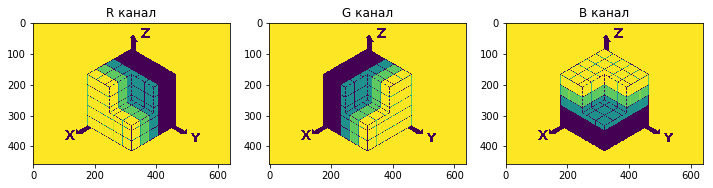

In [10]:
## посмотрим на результат
fig, m_axs = plt.subplots(1, 3, figsize = (12, 8))
ax1, ax2, ax3 = m_axs

ax1.set_title('R канал')
ax1.imshow(r)

ax2.set_title('G канал')
ax2.imshow(g)

ax3.set_title('B канал')
ax3.imshow(b)

Благодаря работе с цветовыми каналами и корреляции цветов мы можем получить интересные результаты. Например, работа по определению лес и пустыни

## Введение в линейную алгебру

# 1!! найти вкусные картинки для теории 

План:
1. Понятие матрицы и вектора
2. Операции с матрицами: перемножение, сложение
3. Линейные преобразования: сдвиг, поворот

In [66]:
## матрицы в numpy

A = np.array(([1, 1 ,1])).reshape((3,1))
B = np.array(([1, 1 ,1])).reshape((1,3))

In [67]:
## примерчик 1 
np.dot(A, B)

array([[1, 1, 1],
       [1, 1, 1],
       [1, 1, 1]])

In [69]:
## примерчик 2
np.dot(B, A)

array([[3]])

In [75]:
A = np.array([[1,1,1], [2, 2, 2], [3,3,3]])
B = np.array([[3,3,3], [2, 2, 2], [1,1,1]])

In [82]:
C = A + B
print(A, '\n\n', B, '\n\n', C)

[[1 1 1]
 [2 2 2]
 [3 3 3]] 

 [[3 3 3]
 [2 2 2]
 [1 1 1]] 

 [[4 4 4]
 [4 4 4]
 [4 4 4]]


In [83]:
A * 2

array([[2, 2, 2],
       [4, 4, 4],
       [6, 6, 6]])

### Афинные преобразования

План:
1. Сдвиг
2. Поворот
3. Трансформация точек
4. Перспектива

#### Сдвиг изображения

In [9]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

Раземер исходного изображения: (768, 1024, 3)


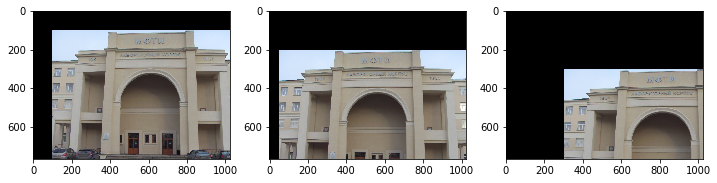

In [64]:
## сдвиг изображения

## посмотрим на размер изображения
print('Раземер исходного изображения:', img.shape)
rows, cols, _ = img.shape

## матрица афинного преобразования
M1 = np.float32([[1, 0, 100], [0, 1, 100]])
M2 = np.float32([[1, 0, 50], [0, 1, 200]])
M3 = np.float32([[1, 0, 300], [0, 1, 300]])

## визуализация
fig, m_axs = plt.subplots(1, 3, figsize=(12,8))
ax1, ax2, ax3 = m_axs

dst1 = cv2.warpAffine(img, M1, (cols, rows))
ax1.imshow(dst1)
dst2 = cv2.warpAffine(img, M2, (cols, rows))
ax2.imshow(dst2)
dst3 = cv2.warpAffine(img, M3, (cols, rows))
ax3.imshow(dst3);

In [6]:
"""cv2.imshow('img', dst)
cv2.waitKey(0)
cv2.destroyAllWindows()"""

#### Поворот изображения

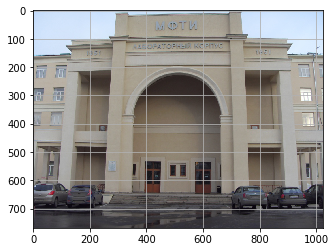

In [62]:
def rotateImage(image, angle):
    image_center = tuple(np.array(image.shape[1::-1]) / 2)
    rot_mat = cv2.getRotationMatrix2D(image_center, angle, scale=1.0)
    result = cv2.warpAffine(image, rot_mat, image.shape[1::-1], flags=cv2.INTER_LINEAR)
    return result


plt.grid()
plt.imshow(rotateImage(img.copy(), 0));

#### Трансформация точек

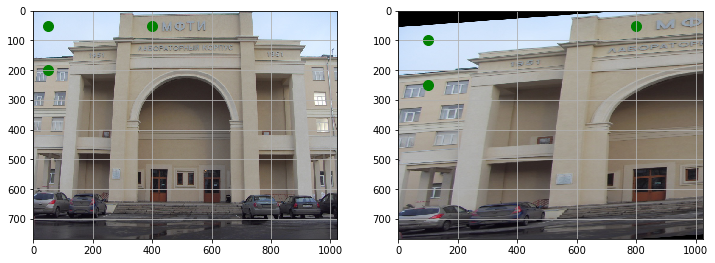

In [60]:
pts1 = np.float32([[50,50],[400,50],[50,200]])
pts2 = np.float32([[100,100],[800,50],[100,250]]) 

M = cv2.getAffineTransform(pts1,pts2) 
dst = cv2.warpAffine(img,M,(cols,rows))

fig, m_axs = plt.subplots(1, 2, figsize=(12,8))
ax1, ax2 = m_axs

dst1 = cv2.warpAffine(img, M1, (cols, rows))
ax1.imshow(img)
ax1.grid()
ax1.scatter([50, 400, 50], [50, 50, 200], color='g', s=100)

dst2 = cv2.warpAffine(img, M2, (cols, rows))
ax2.imshow(dst)
ax2.grid()
ax2.scatter([100, 800, 100], [100, 50, 250], color='g', s=100)

## Фильтры
## 1!! найти вкусные картинки для теории 

План:
1. Понятие свертки
2. Воздействие свертки на матрицу
3. Типы сверток и их приминение

#### Поиграемся с фильтрами

# !!1  каждый фильтр описать из документации с соответсвующим примером 
 

Показать суть фильтров - преобразования для последующего использования в главных задач CV: классификация и сегментация

In [186]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

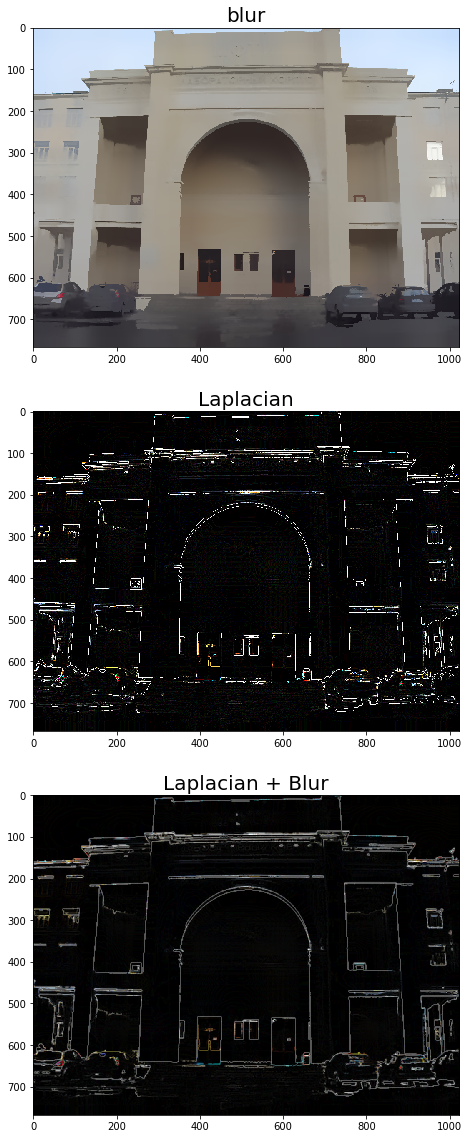

In [187]:
# Теперь пощупаем несколько филттров и их комбинации 
    
## Лапласиан 
kernel = np.array([[0, -1, 0], [-1, 4, -1], [0, -1, 0]], dtype=np.float32)/0.1

## переведем изображение в оттенки серого - цвет нам тут не нужен
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)


## Попробуем несколько типов блюра 
blur = cv2.blur(gray, (3,3))                       ## осреднение значений в ядре 
gaus_blur = cv2.GaussianBlur(gray, (5,5), 0)       ## гауссов блюр 
median_blur = cv2.medianBlur(gray, 5)              ## медиана всех значений в ядре 
bil_blur = cv2.bilateralFilter(gray, 9, 75, 75)    ## двусторонниый фильтр 
pyr_d = cv2.pyrDown(gray)                          ## blur & downsampling
pyr_u = cv2.pyrUp(gray)                            ## blur & upsampling 
pyr_mean = cv2.pyrMeanShiftFiltering(img, 25, 40)  ## выделяет области по цвету (аналог knn в машинке)

#gray_pyr_mean = cv2.cvtColor(pyr_mean, cv2.COLOR_RGB2GRAY)

## Применяем фильтры 
dst = cv2.filter2D(pyr_mean, -1, kernel)           ## находим границы лапласианом
#dst_blur = cv2.GaussianBlur(dst, (5,5),0)
dst_blur = cv2.blur(dst, (3,3))                    ## еще раз блюрим для гладких границ 

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

ax1.set_title('blur', fontsize=20)
ax1.imshow(pyr_mean)
ax2.set_title('Laplacian', fontsize=20)
ax2.imshow(dst)
ax3.set_title('Laplacian + Blur', fontsize=20)
ax3.imshow(dst_blur);


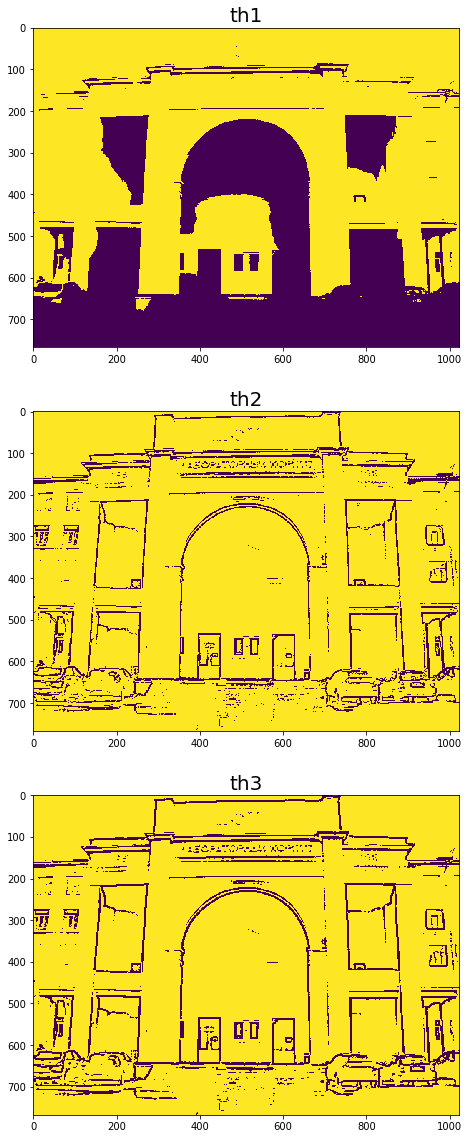

In [214]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)

img = cv2.pyrMeanShiftFiltering(img, 25, 40)
img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

th1 = cv2.threshold(img, 120, 255, cv2.THRESH_BINARY)[1]
th2 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_GAUSSIAN_C, cv2.THRESH_BINARY, 11, 2)
th3 = cv2.adaptiveThreshold(img, 255, cv2.ADAPTIVE_THRESH_MEAN_C, cv2.THRESH_BINARY, 11, 3)

## Визуализация
fig, m_axs = plt.subplots(3, 1, figsize=(24, 20))
ax1, ax2, ax3 = m_axs

ax1.set_title('th1', fontsize=20)
ax1.imshow(th1)
ax2.set_title('th2', fontsize=20)
ax2.imshow(th2)
ax3.set_title('th3', fontsize=20)
ax3.imshow(th3);


## Предобработка изображений 
!! найти вкусные картинки для теории !!

1. Выделение области (ROI)
2. Scale области
3. Удаление/вставка
4. Альфа канал

## Гистограммы 
!! найти вкусные картинки для теории !!

1. Понятие гистограммы
2. Выравнивание гистограммы
3. Гамма коррекция яркости и освещенности

In [332]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img, cv2.COLOR_RGB2GRAY)

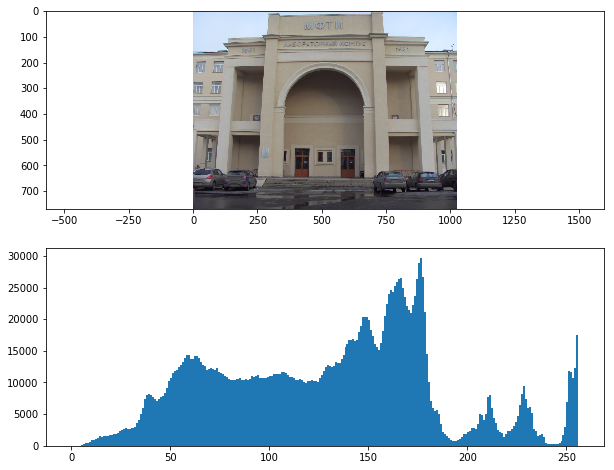

In [298]:
fig, m_axs = plt.subplots(2, 1, figsize=(10, 8))
m_axs[0].axis('equal')
m_axs[0].imshow(img)
m_axs[1].hist(img.ravel(), 256, [0,256]);

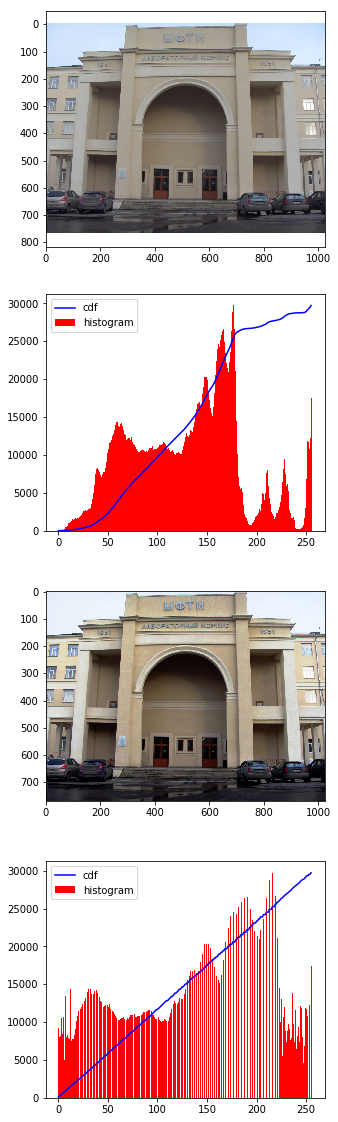

In [299]:
#img = cv2.medianBlur(img, 5)

hist,bins = np.histogram(img.flatten(),256,[0,256])
cdf = hist.cumsum()
cdf_normalized = cdf * hist.max()/ cdf.max()

cdf_m = np.ma.masked_equal(cdf, 0)
cdf_m = (cdf_m - cdf_m.min())*255/(cdf_m.max() - cdf_m.min())
cdf = np.ma.filled(cdf_m, 0).astype('uint8')



img2 = cdf[img]

hist2,bins2 = np.histogram(img2.flatten(),256,[0,256])
cdf2 = hist2.cumsum()
cdf_normalized2 = cdf2 * hist2.max()/ cdf2.max()


fig, m_axs = plt.subplots(4, 1, figsize=(5, 20))
m_axs[0].axis('equal')
m_axs[0].imshow(img)
m_axs[1].plot(cdf_normalized, color = 'b')
m_axs[1].hist(img.flatten(),256,[0,256], color = 'r')
m_axs[1].legend(('cdf','histogram'), loc = 'upper left')

m_axs[2].imshow(img2)
m_axs[3].plot(cdf_normalized2, color = 'b')
m_axs[3].hist(img2.flatten(),256,[0,256], color = 'r')
m_axs[3].legend(('cdf','histogram'), loc = 'upper left');

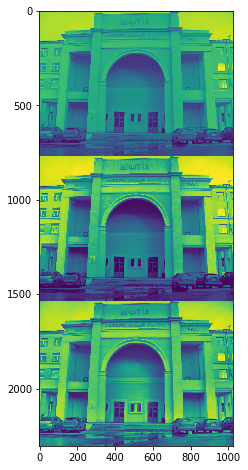

In [284]:
gray = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)
equ = cv2.equalizeHist(gray)
clahe = cv2.createCLAHE(clipLimit=2.0, tileGridSize=(8,8))
cl1 = clahe.apply(gray)

res = np.vstack((gray,equ, cl1)) #stacking images side-by-side
plt.figure(figsize=(12,8))
plt.imshow(res)

In [354]:
img = cv2.imread('img\\lk.jpg')
## для отрисовки в pyplot
#img = cv2.cvtColor(img, cv2.COLOR_BGR2RGB)
#img = cv2.cvtColor(img.copy(), cv2.COLOR_RGB2GRAY)

img = np.int8(img2)  

contrast   = 0
brightness = 10

img = img*(contrast/127 + 1) - contrast + brightness

# we now have an image that has been adjusted for brightness and
# contrast, but we need to clip values not in the range 0 to 255
img = np.clip(img, 0, 255)  # force all values to be between 0 and 255

# finally, convert image back to unsigned 8 bit integer
img = np.uint16(img)

cv2.imshow('Increased contrast', img)
cv2.waitKey(0)
cv2.destroyAllWindows()

In [350]:
img = cv2.imread('img\\lk.jpg')
cv2.imshow("Original image",img)

# CLAHE (Contrast Limited Adaptive Histogram Equalization)
clahe = cv2.createCLAHE(clipLimit=2., tileGridSize=(8,8))

lab = cv2.cvtColor(img, cv2.COLOR_BGR2LAB)  # convert from BGR to LAB color space
l, a, b = cv2.split(lab)  # split on 3 different channels

l2 = clahe.apply(l)  # apply CLAHE to the L-channel

lab = cv2.merge((l2,a,b))  # merge channels
img2 = cv2.cvtColor(lab, cv2.COLOR_LAB2BGR)  # convert from LAB to BGR
cv2.imshow('Increased contrast', img2)
#cv2.imwrite('sunset_modified.jpg', img2)

cv2.waitKey(0)
cv2.destroyAllWindows()

In [ ]:
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

(0, 256)

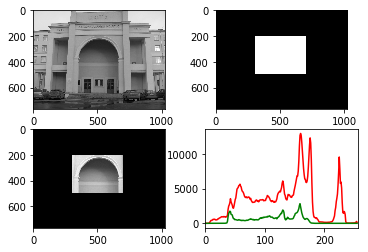

In [225]:
mask = np.zeros(img.shape[:2], np.uint8)
mask[200:500, 300:700] = 255
masked_img = cv2.bitwise_and(img,img,mask = mask)
# Calculate histogram with mask and without mask
# Check third argument for mask
hist_full = cv2.calcHist([img],[0],None,[256],[0,256])
hist_mask = cv2.calcHist([img],[0],mask,[256],[0,256])
plt.subplot(221), plt.imshow(img, 'gray')
plt.subplot(222), plt.imshow(mask,'gray')
plt.subplot(223), plt.imshow(masked_img, 'gray')
plt.subplot(224), plt.plot(hist_full, color='r'), plt.plot(hist_mask, color='g')
plt.xlim([0,256])


## Контур
!! найти вкусные картинки для теории !!

1. Понятие контура
2. Понятие производной для поиска конутра
3. Другие методы поиска контура: бинаризация по освещенности, преобразования Хафа, операторыне методы (свертки)

## Гистограмма направленных градиентов

Разбор поста с хабр про HOG - https://habr.com/post/306568/

## Шум
*Дополнительная глава

1. Классы и типы шумов
2. Как добавить шум с помощью фильтров
3. Блюр
4. Избавление от шума - выравнивание картинки

!! задачка: зазумить таблчку у нк и сделать читабельной - провести нормализацию